<a href="https://colab.research.google.com/github/Matheus-PM/Projeto-Turing/blob/main/Analises_iniciais_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código Inicial — Levantamento Inicial, Visualização e Pré-Processamento dos Dados

Neste bloco, realizo a visualização inicial do dataset do **Sistema de Informações sobre Mortalidade (SIM)**. Também inicio o cálculo de colunas dependentes da variável alvo.

📄 **Fonte dos dados (CSV):**  
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

📘 **Dicionário de Dados (Data Dictionary):**  
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

 **Site Base dos dados:**  
https://opendatasus.saude.gov.br/dataset/sim/

**Documentação Pysus**

# Importando Bibliotecas e dados

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pysus import SIM

# Carrega o módulo SIM
sim = SIM().load()

# Obtém os arquivos de 2023 para o estado de SP e grupo CID10
arquivos_2023 = sim.get_files("CID10", year=2023)

# Faz o download do arquivo (ou dos arquivos, se houver mais de um)
parquets = [arquivo.download() for arquivo in arquivos_2023]

# Lê os dados como DataFrame
import pandas as pd

dfs = [pq.to_dataframe() for pq in parquets]

# Junta todos os dataframes, caso haja mais de um
df_2023 = pd.concat(dfs, ignore_index=True)

# Exibe as 5 primeiras linhas
print(df_2023.head())


TimeoutError: [Errno 110] Connection timed out

In [ ]:
df_2023.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,01012023,0610,812,120070,26011941,481,1,4,...,,,,,,,,,,2067
1,1,2,01012023,1305,813,130180,20081966,456,2,4,...,,,,,,,,,,2146
2,1,2,01012023,0020,812,120030,15061968,454,2,1,...,,,,,,,,,,2196
3,1,2,01012023,1430,812,120045,14111965,457,1,4,...,,,,,,,,,,2839
4,1,2,01012023,1040,812,120035,12021958,464,2,4,...,,,,,,,,,,3066


In [ ]:
df_2023.columns

Index(['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV

In [ ]:
df_2023.shape

(2931220, 87)

In [ ]:
df_2023['CIRCOBITO'].value_counts()

,count
CIRCOBITO,
,2623426
1,137052
3,83226
9,44982
2,32518
4,10016


In [ ]:
df_suicidio = df_2023[df_2023['CIRCOBITO'] == '2']

In [ ]:
df_suicidio

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
24,1,2,02012023,1100,813,130260,25101981,441,1,4,...,,,,,,,,,,7886
39,1,2,04012023,1920,812,120020,27082003,419,1,4,...,,,,,,,,,,13647
137,1,2,14012023,1200,812,120040,25101980,442,1,4,...,,,,,,,,,,53256
166,1,2,17012023,0830,812,120060,15101961,461,2,4,...,,,,,,,,,,64794
192,1,2,20012023,0100,812,120040,21011996,426,1,4,...,,,,,,,,,,75977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931022,1,2,23122023,0900,821,211000,17111987,436,2,2,...,,,M,,,,,,,1432214
2931049,1,2,24122023,2100,829,290320,29051988,435,1,1,...,,,,,,,,,,1435294
2931069,1,2,25122023,1410,841,411770,16051969,454,1,1,...,,,,,,,,,,1438454
2931083,1,2,26122023,,817,171750,13111981,442,1,4,...,,,,,,,,,,1442252


In [ ]:
df_suicidio['ASSISTMED'].value_counts()

,count
ASSISTMED,
2,19990
,5398
1,4840
9,2290


In [ ]:
# Total de entradas
total = len(df)
coluna = 'CIRCOBITO'

# Verificações
nulos = df[coluna].isnull().sum()
vazios = (df[coluna] == '').sum()
nan_texto = (df[coluna].astype(str).str.upper() == 'NAN').sum()

# Numéricos (exclui NaN e vazios antes de checar)
numericos = pd.to_numeric(df[coluna], errors='coerce').notna().sum()

# Percentuais
print(f"Análise da coluna {coluna} (%):")
print(f"- Valores nulos (NaN/None): {nulos / total:.2%}")
print(f"- Valores em branco (''): {vazios / total:.2%}")
print(f"- Texto 'NaN': {nan_texto / total:.2%}")
print(f"- Valores numéricos válidos: {numericos / total:.2%}")
print(f"- Temos {df.shape[0] - nulos} dados para trabalhar")

Análise da coluna CIRCOBITO (%):
- Valores nulos (NaN/None): 89.96%
- Valores em branco (''): 0.00%
- Texto 'NaN': 89.96%
- Valores numéricos válidos: 10.04%
- Temos 143190 dados para trabalhar


## Importando conjunto de dados 2023 pelo frontend

In [2]:
# URL do arquivo CSV
url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv"

# Lê o arquivo CSV diretamente da URL
df = pd.read_csv(url, sep=';', encoding='latin1', low_memory=False)

# Exibe as 5 primeiras linhas
print(df.head())

   contador  ORIGEM  TIPOBITO   DTOBITO  HORAOBITO  NATURAL  CODMUNNATU  \
0         1       1         2  14022023      930.0    833.0    330270.0   
1         2       1         2  14022023     1730.0    822.0    221110.0   
2         3       1         2  14022023      500.0    822.0    220790.0   
3         4       1         2  14022023     2235.0    823.0    231180.0   
4         5       1         2  14022023      940.0    841.0    411350.0   

       DTNASC  IDADE  SEXO  ...  TPRESGINFO  TPNIVELINV  DTCADINF  MORTEPARTO  \
0  10071954.0    468     1  ...         NaN         NaN       NaN         NaN   
1  12091956.0    466     1  ...         NaN         NaN       NaN         NaN   
2  10011953.0    470     2  ...         NaN         NaN       NaN         NaN   
3  15121943.0    479     2  ...         NaN         NaN       NaN         NaN   
4   9041973.0    449     2  ...         NaN           M       NaN         NaN   

   DTCONCASO  ALTCAUSA  CAUSABAS_O  TPPOS  TP_ALTERA  CB_ALT  

In [4]:
# Verificar quais linhas são duplicadas (exceto a primeira ocorrência)
duplicadas = df[df.duplicated()]

# Contar quantas são
quantidade = duplicadas.shape[0]

print(f"Quantidade de linhas duplicadas: {quantidade}")
print("Exemplos de duplicatas:")
print(duplicadas)


Quantidade de linhas duplicadas: 0
Exemplos de duplicatas:
Empty DataFrame
Columns: [contador, ORIGEM, TIPOBITO, DTOBITO, HORAOBITO, NATURAL, CODMUNNATU, DTNASC, IDADE, SEXO, RACACOR, ESTCIV, ESC, ESC2010, SERIESCFAL, OCUP, CODMUNRES, LOCOCOR, CODESTAB, CODMUNOCOR, IDADEMAE, ESCMAE, ESCMAE2010, SERIESCMAE, OCUPMAE, QTDFILVIVO, QTDFILMORT, GRAVIDEZ, SEMAGESTAC, GESTACAO, PARTO, OBITOPARTO, PESO, TPMORTEOCO, OBITOGRAV, OBITOPUERP, ASSISTMED, EXAME, CIRURGIA, NECROPSIA, LINHAA, LINHAB, LINHAC, LINHAD, LINHAII, CAUSABAS, CB_PRE, COMUNSVOIM, DTATESTADO, CIRCOBITO, ACIDTRAB, FONTE, NUMEROLOTE, DTINVESTIG, DTCADASTRO, ATESTANTE, STCODIFICA, CODIFICADO, VERSAOSIST, VERSAOSCB, FONTEINV, DTRECEBIM, ATESTADO, DTRECORIGA, OPOR_DO, CAUSAMAT, ESCMAEAGR1, ESCFALAGR1, STDOEPIDEM, STDONOVA, DIFDATA, NUDIASOBCO, DTCADINV, TPOBITOCOR, DTCONINV, FONTES, TPRESGINFO, TPNIVELINV, DTCADINF, MORTEPARTO, DTCONCASO, ALTCAUSA, CAUSABAS_O, TPPOS, TP_ALTERA, CB_ALT]
Index: []

[0 rows x 86 columns]


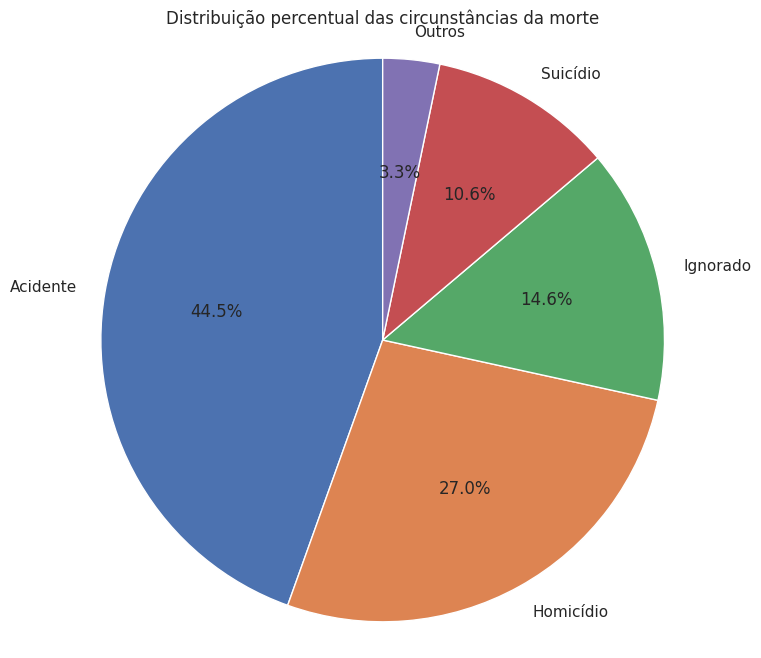

In [9]:
# Estilo visual do Seaborn
sns.set(style="whitegrid")

# Substitui os códigos pelos nomes
df['CIRCOBITO_LABEL'] = df['CIRCOBITO'].map({
    1: 'Acidente',
    2: 'Suicídio',
    3: 'Homicídio',
    4: 'Outros',
    9: 'Ignorado'
})

# Conta os valores e calcula a porcentagem
circo_counts = df['CIRCOBITO_LABEL'].value_counts()
circo_percent = circo_counts / circo_counts.sum() * 100

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    circo_percent,
    labels=circo_percent.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribuição percentual das circunstâncias da morte')
plt.axis('equal')  # Mantém o formato circular
plt.show()